## Data Information

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.selection import DropFeatures

import warnings
warnings.filterwarnings("ignore")

C:\Users\Gauri Mohite\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data

In [2]:
df = pd.read_csv(r"C:\Users\Gauri Mohite\ALL PROJECTS\PROJECTS EXCEL FILES\Titanic Survival\train.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S


In [3]:
df1 = df.copy()

## Data Preprocessing

In [4]:
df.shape

(891, 12)

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Null values percentage
round(df.isnull().sum()*100/len(df),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [7]:
# Checking of duplicate records
df[df.duplicated()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Categorical Columns
df.select_dtypes(include='O').keys()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
# Numeric Columns
df.select_dtypes(include=['int64','float']).keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
# See value count of required column
L = ['Sex','Survived','Age','Pclass', 'SibSp', 'Parch','Fare','Embarked']
for i in L:
    print("*"*50)
    print(i, " :--")
    print(df[i].value_counts())

**************************************************
Sex  :--
male      577
female    314
Name: Sex, dtype: int64
**************************************************
Survived  :--
0    549
1    342
Name: Survived, dtype: int64
**************************************************
Age  :--
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
**************************************************
Pclass  :--
3    491
1    216
2    184
Name: Pclass, dtype: int64
**************************************************
SibSp  :--
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
**************************************************
Parch  :--
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
**************************************************
Fare  :--
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    3

## Exploratory Data analysis

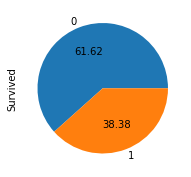

In [13]:
plt.figure(figsize=(4,3))
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

From total 61.62% people are dead and 38.38% are survived

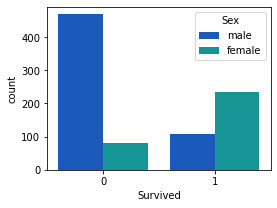

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'winter')
plt.show()

We see that compare to males survival rate of females is more

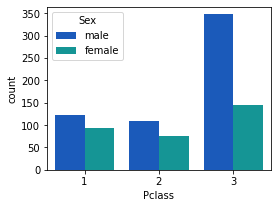

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Pclass', hue = 'Sex', data = df, palette = 'winter')
plt.show()

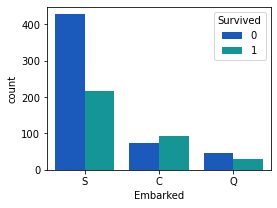

In [16]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Embarked', hue = 'Survived', data = df, palette = 'winter')
plt.show()

<Figure size 864x216 with 0 Axes>

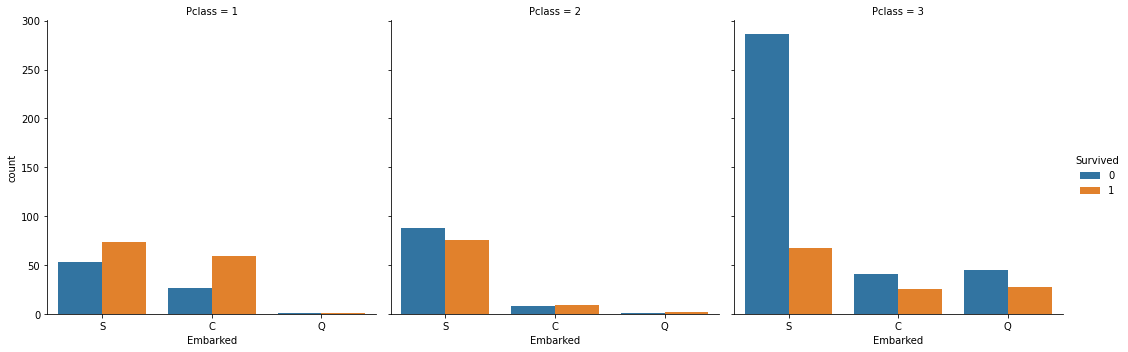

In [17]:
plt.figure(figsize=(12,3))
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)
plt.show()

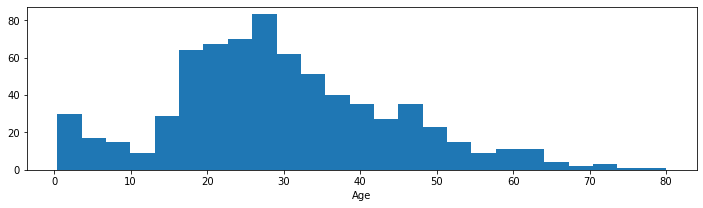

In [18]:
plt.figure(figsize=(12,3))
plt.hist(df['Age'],bins=25)
plt.xlabel('Age')
plt.show()

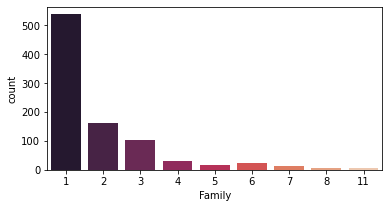

In [19]:
# From SibSp and Parch we can make new column namely Family
df["Family"] = df["SibSp"] + df ["Parch"] + 1 # added 1 cause alone indicate 0 in data so 0+1=1 

plt.figure(figsize=(6,3))
sns.countplot(df["Family"],palette = 'rocket')
plt.show()

count of single person traveler is greater

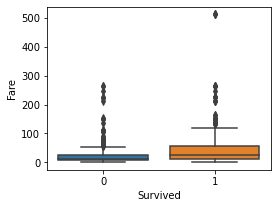

In [20]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x="Survived", y="Fare")
plt.show()

Outliers availabe in fare column

Here we have handled outliers by using binning

## Handling Missing values

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [22]:
# Cabin column more than 70% blank so we drop that column
# Also drop unnecessary columns

df.drop(['PassengerId', 'Name','SibSp','Parch', 'Ticket', 'Cabin'],axis=1,inplace=True)
df.shape

(891, 7)

In [23]:
df2 = df.copy()

In [24]:
# For Age column we impute Mean
SI_Age = SimpleImputer()
df["Age"]=SI_Age.fit_transform(df[["Age"]])

# For Embarked column we impute mode
SI_Embarked = SimpleImputer(strategy="most_frequent")
df["Embarked"]=SI_Embarked.fit_transform(df[["Embarked"]])

#### Data distribution after imputation

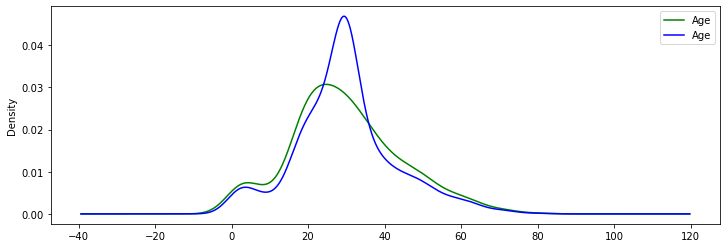

In [25]:
#Plotting the distplots for Age 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

# Original Variable Distribution
df1["Age"].plot(kind="kde",ax=ax,color='green')

# After Imputation Variable Distribution
df["Age"].plot(kind="kde",ax=ax,color='blue')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

## Data Encoding

In [27]:
df.select_dtypes(include='O').keys()

Index(['Sex', 'Embarked'], dtype='object')

In [28]:
# Initialize the OneHotEncoder
OneHotenc = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')

# Fit and transform the encoder on the DataFrame column
encoded_data = OneHotenc.fit_transform(df[["Sex","Embarked"]])

# Get the column names for the one-hot encoded columns
column_names = OneHotenc.get_feature_names_out(input_features=["Sex","Embarked"])

# Create a new DataFrame with the one-hot encoded columns and column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
print(df)

     Survived  Pclass     Sex        Age     Fare Embarked  Family  Sex_male  \
0           0       3    male  22.000000   7.2500        S       2       1.0   
1           1       1  female  38.000000  71.2833        C       2       0.0   
2           1       3  female  26.000000   7.9250        S       1       0.0   
3           1       1  female  35.000000  53.1000        S       2       0.0   
4           0       3    male  35.000000   8.0500        S       1       1.0   
..        ...     ...     ...        ...      ...      ...     ...       ...   
886         0       2    male  27.000000  13.0000        S       1       1.0   
887         1       1  female  19.000000  30.0000        S       1       0.0   
888         0       3  female  29.699118  23.4500        S       4       0.0   
889         1       1    male  26.000000  30.0000        C       1       1.0   
890         0       3    male  32.000000   7.7500        Q       1       1.0   

     Embarked_Q  Embarked_S  
0        

In [29]:
df.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [30]:
df.shape

(891, 8)

In [31]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

## Data Scaling [StandardScaler]

In [32]:
# X = df.iloc[:,1:8]
X = df.drop(["Survived"],axis=1)

# y = df.iloc[:,0]
y = df["Survived"]

In [33]:
st_scaler = StandardScaler()

X= st_scaler.fit_transform(X)
X

array([[ 0.82737724, -0.5924806 , -0.50244517, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.78684529, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.48885426, ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        , -0.17626324, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.04438104, ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.49237783, ...,  0.73769513,
         3.25137334, -1.62380254]])

In [34]:
X.shape

(891, 7)

In [35]:
X = pd.DataFrame(X,columns=['Pclass', 'Age', 'Fare', 'Family', 'Sex_male', 'Embarked_Q',
       'Embarked_S'])

In [36]:
X.sample(5)

,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S
194,-1.566107,1.100515,-0.090272,-0.560975,-1.355574,-0.307562,-1.623803
576,-0.369365,0.330972,-0.386671,-0.560975,-1.355574,-0.307562,0.615838
713,0.827377,-0.053800,-0.457478,-0.560975,0.737695,-0.307562,0.615838
191,-0.369365,-0.823344,-0.386671,-0.560975,0.737695,-0.307562,0.615838
750,-0.369365,-1.977659,-0.185324,0.679295,-1.355574,-0.307562,0.615838


## Train Test Split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Modeling

### LogisticRegression

In [38]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
#Training
y_pred_log_train = log_model.predict(X_train)
accuracy_score(y_train,y_pred_log_train)

0.8019662921348315

In [40]:
#Testing
y_pred_log_test = log_model.predict(X_test)
accuracy_score(y_test,y_pred_log_test)

0.8044692737430168

### DecisionTreeClassifier

In [41]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
#Training
y_pred_dtree_train = dtree_model.predict(X_train)
accuracy_score(y_train,y_pred_dtree_train )

0.9803370786516854

In [43]:
#Testing
y_pred_dtree_test = dtree_model.predict(X_test)
accuracy_score(y_test,y_pred_dtree_test )

0.7932960893854749

### RandomForestClassifier

In [44]:
Rf_model = RandomForestClassifier(n_estimators=10,random_state=42)
Rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [45]:
#Training
y_pred_Rf_train = Rf_model.predict(X_train)
accuracy_score(y_train,y_pred_Rf_train )

0.9564606741573034

In [46]:
#Testing
y_pred_Rf_test = Rf_model.predict(X_test)
accuracy_score(y_test,y_pred_Rf_test )

0.8100558659217877

## Make Pipeline

In [47]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

In [48]:
X2 = df2.drop(["Survived"],axis=1)
y2 = df2["Survived"]

In [49]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2,3]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[4])
],remainder='passthrough')

In [50]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4])
],remainder='passthrough')

In [51]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,8))
])

In [52]:
trf4 = LogisticRegression()

In [53]:
Pipe = make_pipeline(trf1,trf2,trf3,trf4)

In [54]:
Pipe.fit(X2,y2)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2, 3]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('logisticregression', LogisticRegression())])

In [55]:
Test = pd.read_csv(r"C:\Users\Gauri Mohite\ALL PROJECTS\PROJECTS EXCEL FILES\Titanic Survival\test.csv")
Test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
350,1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,D10 D12,C
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S


In [56]:
Test["Family"]= Test["SibSp"]+Test["Parch"]+1

In [57]:
Test.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin'],axis=1,inplace=True)

In [58]:
Pipe.predict(Test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,